In [136]:
import networkx as nx
import matplotlib.pyplot as plt

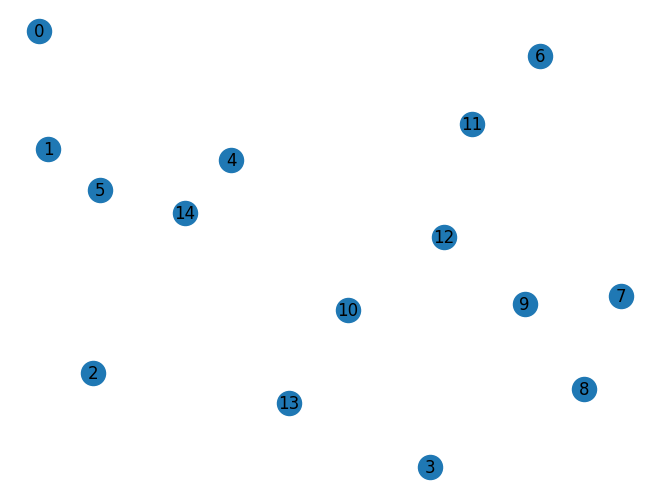

In [137]:
# Define node data as a dictionary with positions as values
node_data = {
    0: (-2.79, 2.8),
    1: (-2.73, 1.91),
    2: (-2.44, 0.23),
    3: (-0.27, -0.48),
    4: (-1.55, 1.83),
    5: (-2.4, 1.6),
    6: (0.44, 2.61),
    7: (0.96, 0.81),
    8: (0.72, 0.11),
    9: (0.34, 0.75),
    10: (-0.8, 0.7),
    11: (0, 2.1),
    12: (-0.18, 1.25),
    13: (-1.18, 0.0),
    14: (-1.85, 1.43)
}

# Create an empty graph object
G = nx.Graph()

# Add nodes to the graph with their positions
for node, pos in node_data.items():
    G.add_node(node, pos=pos)

# Draw the graph with node positions
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, with_labels=True)
plt.show()


In [138]:
def Getdistances(node1, node2):
    x1 = node_data[node1][0]
    y1 = node_data[node1][1]
    x2 = node_data[node2][0]
    y2 = node_data[node2][1]
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

In [139]:
def check_path_intersection(node1, node2, node3, node4):
    p1 = node_data[node1]
    p2 = node_data[node2]
    q1 = node_data[node3]
    q2 = node_data[node4]
    # Calculate slope and y-intercept of first line segment
    m1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b1 = p1[1] - m1 * p1[0]
    
    # Calculate slope and y-intercept of second line segment
    m2 = (q2[1] - q1[1]) / (q2[0] - q1[0])
    b2 = q1[1] - m2 * q1[0]
    
    # Check if lines are parallel
    if m1 == m2:
        return False
    
    # Calculate intersection point of two lines
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    
    # Check if intersection point is within both line segments
    if ((p1[0] <= x <= p2[0] or p2[0] <= x <= p1[0]) and
        (q1[0] <= x <= q2[0] or q2[0] <= x <= q1[0]) and
        (p1[1] <= y <= p2[1] or p2[1] <= y <= p1[1]) and
        (q1[1] <= y <= q2[1] or q2[1] <= y <= q1[1])):
        return True
    
    return False
    

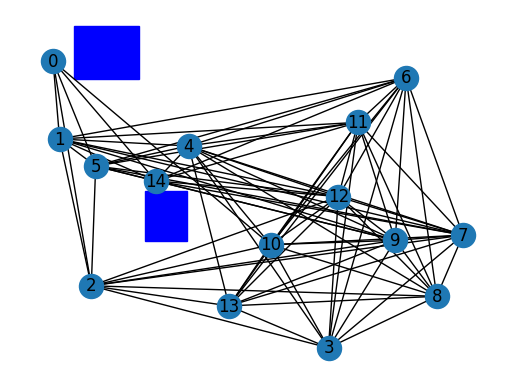

In [140]:
from matplotlib.path import Path

# For pos1
x1 = [-2.6, -2, -2, -2.6]
y1 = [2.6, 2.6, 3.2, 3.2]

# For pos2
x2 = [-1.95, -1.56, -1.56, -1.95]
y2 = [0.74, 0.74, 1.32, 1.32]


# Create a path object from the polygon vertices
vertices1 = [(x1[i], y1[i]) for i in range(len(x1))]
vertices2 = [(x2[i], y2[i]) for i in range(len(x2))]
path1 = Path(vertices1)
path2 = Path(vertices2)

# Define a function to check if an edge intersects with the polygon
def intersects_polygon(u, v):
    u_pos = G.nodes[u]['pos']
    v_pos = G.nodes[v]['pos']
    edge = Path([u_pos, v_pos])
    # Check if the edge intersects with the two squares
    return path1.intersects_path(edge) or path2.intersects_path(edge)

# Add edges between non-adjacent nodes only if they do not intersect with the polygon
for u in G.nodes():
    for v in G.nodes():
        if u >= v:
            continue
        if not G.has_edge(u, v) and not intersects_polygon(u, v):
            G.add_edge(u, v, weight=Getdistances(u, v))
        
# Draw the graph with node positions
# create a new figure and axis
fig, ax = plt.subplots()

# plot the polygon
ax.fill(x1, y1, color='blue')
ax.fill(x2, y2, color='blue')

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, with_labels=True)
plt.show()

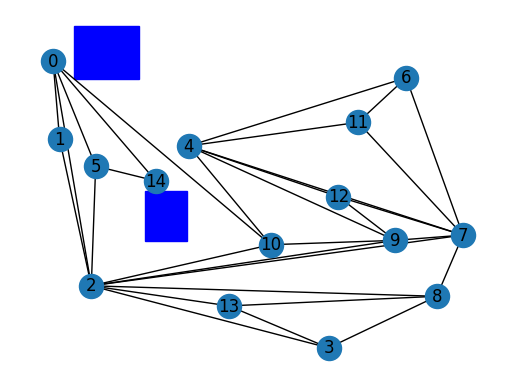

In [141]:
for u in G.nodes():
    for v in G.nodes():
        if G.has_edge(u, v):
            for x in G.nodes():
                if x!=u and x!=v:
                    for y in G.nodes():
                        if y!=u and y!=v and y!=x:
                            if G.has_edge(x, y):
                                if check_path_intersection(u, v, x, y):
                                    # print('The path from', u, 'to', v, 'intersects with the path from', x, 'to', y)
                                    G.remove_edge(x, y)

# Draw the graph with node positions
# create a new figure and axis
fig, ax = plt.subplots()

# plot the polygon
ax.fill(x1, y1, color='blue')
ax.fill(x2, y2, color='blue')

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, with_labels=True)
plt.show()

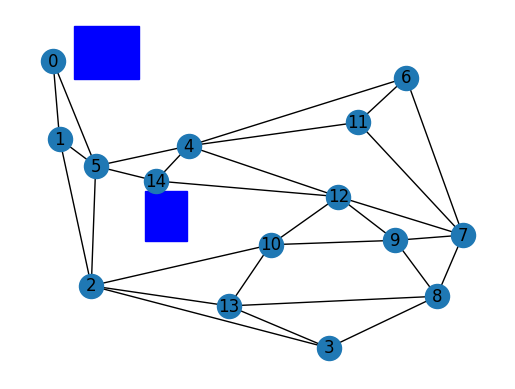

In [142]:
# Manually make the graph looks better
G.remove_edge(0,2)
G.remove_edge(0,10)
G.remove_edge(2,7)
G.remove_edge(2,8)
G.remove_edge(2,9)
G.remove_edge(4,7)
G.remove_edge(4,9)
G.remove_edge(0,14)
G.remove_edge(4,10)
G.add_edge(5,4)
G.add_edge(12,14)
G.add_edge(1,5)
G.add_edge(8,9)
G.add_edge(4,14)
G.add_edge(10,13)
G.add_edge(10,12)
# Draw the graph with node positions
# create a new figure and axis
fig, ax = plt.subplots()

# plot the polygon
ax.fill(x1, y1, color='blue')
ax.fill(x2, y2, color='blue')

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, with_labels=True)
plt.show()

In [143]:
# Compute shortest path
pairs = [(0,3),(0,6),(0,12)]
paths = []
for pair in pairs:
    paths.append(nx.shortest_path(G, pair[0], pair[1], weight='weight'))
# Print the positions of the nodes in the path
for path in paths:
    print(path)
    print([G.nodes[node]['pos'] for node in path])

[0, 1, 2, 3]
[(-2.79, 2.8), (-2.73, 1.91), (-2.44, 0.23), (-0.27, -0.48)]
[0, 5, 4, 6]
[(-2.79, 2.8), (-2.4, 1.6), (-1.55, 1.83), (0.44, 2.61)]
[0, 5, 14, 12]
[(-2.79, 2.8), (-2.4, 1.6), (-1.85, 1.43), (-0.18, 1.25)]


In [144]:
# Compute shortest path
pairs = [(0,7),(0,6),(0,10)]
paths = []
for pair in pairs:
    paths.append(nx.shortest_path(G, pair[0], pair[1], weight='weight'))
# Print the positions of the nodes in the path
for path in paths:
    print(path)
    print([G.nodes[node]['pos'] for node in path])

[0, 5, 14, 12, 7]
[(-2.79, 2.8), (-2.4, 1.6), (-1.85, 1.43), (-0.18, 1.25), (0.96, 0.81)]
[0, 5, 4, 6]
[(-2.79, 2.8), (-2.4, 1.6), (-1.55, 1.83), (0.44, 2.61)]
[0, 5, 14, 12, 10]
[(-2.79, 2.8), (-2.4, 1.6), (-1.85, 1.43), (-0.18, 1.25), (-0.8, 0.7)]
